In [ ]:
!pip install -U pymoo
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210095 sha256=752b18d82fb6cdafb8f9b1f4e9a362593782fca5c21dff708f3780263fb252e4
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.3 MB/s 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.utils import to_categorical
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pymoo.visualization.scatter import Scatter
from pymoo.core.callback import Callback
from skopt import gp_minimize

In [ ]:
data = pd.read_csv("data/Credit.csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
cat_columns = list(data.select_dtypes(include=['object']).columns)

In [ ]:
le = LabelEncoder()
for col in cat_columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:, :-1],
    data.iloc[:, -1],
    test_size=0.3,
    random_state=0
)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 3s 24ms/step - loss: 10.2532 - accuracy: 0.5518 - val_loss: 8.8544 - val_accuracy: 0.3357
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 8.9476 - accuracy: 0.4839 - val_loss: 12.1662 - val_accuracy: 0.6571
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 6.9942 - accuracy: 0.4982 - val_loss: 2.5163 - val_accuracy: 0.6214
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 3.6604 - accuracy: 0.5429 - val_loss: 10.6733 - val_accuracy: 0.6643
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 3.6051 - accuracy: 0.5518 - val_loss: 2.5919 - val_accuracy: 0.3143
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 4.3807 - accuracy: 0.5893 - val_loss: 2.3219 - val_accuracy: 0.6643
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 3.2181 - accuracy: 0.6196 - val_loss: 0.7407 - val_accuracy: 0.6643
Epoch 8/20
18/18

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Testing accuracy: {accuracy}')

10/10 [==============================] - 0s 2ms/step
Testing accuracy: 0.5566666666666666


In [ ]:
def build_model():
    # Criar o modelo da rede neural convolucional
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(20,)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    return model

In [ ]:
def chebyshev_loss(y_true, y_pred, model, lambda1, lambda2):
    # Função de perda Categorical Crossentropy
    ce_loss = keras.losses.BinaryCrossentropy()(y_true, y_pred)

    # Função de regularização L2
    l2_loss = sum([tf.nn.l2_loss(layer.kernel) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])

    # Combinar as funções de perda com os pesos de Chebyshev
    combined_loss = lambda1 * ce_loss + lambda2 * l2_loss

    return combined_loss

In [ ]:
def objective(params):
    lambda1, lambda2 = params
    
    # Construir o modelo da CNN
    model = build_model()

    # Compilar o modelo com a função de perda personalizada e otimizador
    model.compile(loss=lambda y_true, y_pred: chebyshev_loss(y_true, y_pred, model, lambda1, lambda2), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

    # Treinar o modelo
    model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.1, verbose=1)

    # Avaliar o desempenho do modelo
    score = model.evaluate(x_test, y_test, verbose=0)
    
    return score[0]

In [ ]:
space = [(0.0001, 0.01, "uniform"), (0.0001, 0.01, "uniform")]

In [ ]:
result = gp_minimize(func=objective, dimensions=space, n_calls=10, random_state=42, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
Epoch 1/2
5/5 [==============================] - 1s 65ms/step - loss: 0.1656 - accuracy: 0.5143 - val_loss: 0.1604 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 12ms/step - loss: 0.1182 - accuracy: 0.4952 - val_loss: 0.1118 - val_accuracy: 0.6571
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.6112
Function value obtained: 0.1002
Current minimum: 0.1002
Iteration No: 2 started. Evaluating function at random point.
Epoch 1/2
5/5 [==============================] - 1s 146ms/step - loss: 2.6279 - accuracy: 0.3016 - val_loss: 1.9365 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 16ms/step - loss: 1.6215 - accuracy: 0.3016 - val_loss: 0.9823 - val_accuracy: 0.3429
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.2864
Function value obtained: 1.0253
Current minimum: 0.1002
Iteration No: 3 started. Evaluating function at random point.

In [ ]:
best_lambda1, best_lambda2 = result.x
print(f"Melhores hiperparâmetros encontrados: lambda1 = {best_lambda1}, lambda2 = {best_lambda2}")

Melhores hiperparâmetros encontrados: lambda1 = 0.00939167181925593, lambda2 = 0.00010770978182604186


In [ ]:
#Construir e treinar o melhor modelo
best_model = build_model()
best_model.compile(loss=lambda y_true, y_pred: chebyshev_loss(y_true, y_pred, best_model, best_lambda1, best_lambda2),
optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
best_model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.1, verbose=1)

Epoch 1/2
5/5 [==============================] - 1s 64ms/step - loss: 2.7899 - accuracy: 0.3016 - val_loss: 1.4197 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 11ms/step - loss: 0.6625 - accuracy: 0.3778 - val_loss: 0.3875 - val_accuracy: 0.6429


In [ ]:
#Avaliar o melhor modelo
score = best_model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {score[0]}, Test accuracy: {score[1]}")

10/10 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.7100
Test loss: 0.2897811532020569, Test accuracy: 0.7099999785423279


In [ ]:
#Função para calcular a norma L2 dos pesos do modelo
def calculate_l2_norm(model):
    l2_norm = sum([np.sum(np.square(layer.kernel.numpy())) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])
    return l2_norm

In [ ]:
#Preparar os dados para o gráfico do conjunto Pareto
pareto_error_data = [objective(params) for params in result.x_iters]
pareto_norm_data = [calculate_l2_norm(build_model()) for params in result.x_iters]

Epoch 1/2
5/5 [==============================] - 1s 90ms/step - loss: 2.3045 - accuracy: 0.3016 - val_loss: 1.6586 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 23ms/step - loss: 1.3956 - accuracy: 0.3016 - val_loss: 0.8363 - val_accuracy: 0.3429
Epoch 1/2
5/5 [==============================] - 1s 65ms/step - loss: 0.8555 - accuracy: 0.6984 - val_loss: 0.4705 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 17ms/step - loss: 0.4006 - accuracy: 0.4508 - val_loss: 0.4662 - val_accuracy: 0.3429
Epoch 1/2
5/5 [==============================] - 1s 65ms/step - loss: 0.4316 - accuracy: 0.6984 - val_loss: 0.3541 - val_accuracy: 0.6571
Epoch 2/2
5/5 [==============================] - 0s 12ms/step - loss: 0.1979 - accuracy: 0.6968 - val_loss: 0.0658 - val_accuracy: 0.6286
Epoch 1/2
5/5 [==============================] - 2s 63ms/step - loss: 1.5067 - accuracy: 0.3016 - val_loss: 0.8171 - val_accuracy: 0.3429
Epoch 2/2
5/5 [===================

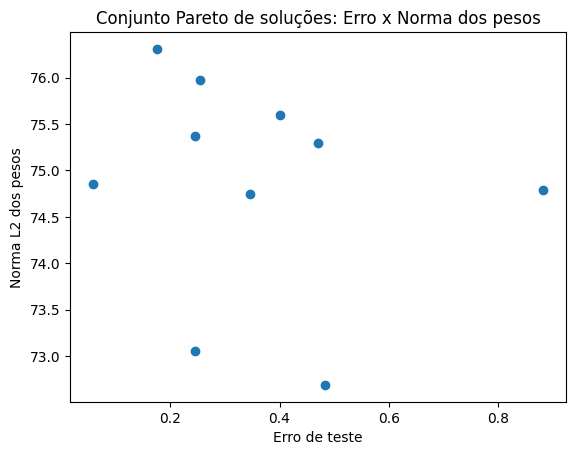

In [ ]:
#Criar o gráfico do conjunto Pareto
plt.scatter(pareto_error_data, pareto_norm_data)
plt.xlabel("Erro de teste")
plt.ylabel("Norma L2 dos pesos")
plt.title("Conjunto Pareto de soluções: Erro x Norma dos pesos")
plt.show()

Epoch 1/2
5/5 [==============================] - 1s 64ms/step - loss: 0.2814 - accuracy: 0.5397 - val_loss: 0.0891 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 10ms/step - loss: 0.1430 - accuracy: 0.6143 - val_loss: 0.1481 - val_accuracy: 0.6571
Epoch 1/2
5/5 [==============================] - 1s 76ms/step - loss: 2.0125 - accuracy: 0.3016 - val_loss: 1.1715 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 17ms/step - loss: 0.7061 - accuracy: 0.3254 - val_loss: 0.3643 - val_accuracy: 0.6571
Epoch 1/2
5/5 [==============================] - 1s 58ms/step - loss: 0.2116 - accuracy: 0.5397 - val_loss: 0.2251 - val_accuracy: 0.3429
Epoch 2/2
5/5 [==============================] - 0s 11ms/step - loss: 0.1297 - accuracy: 0.5476 - val_loss: 0.1483 - val_accuracy: 0.6571
Epoch 1/2
5/5 [==============================] - 1s 65ms/step - loss: 0.2267 - accuracy: 0.4492 - val_loss: 0.1441 - val_accuracy: 0.6286
Epoch 2/2
5/5 [===================

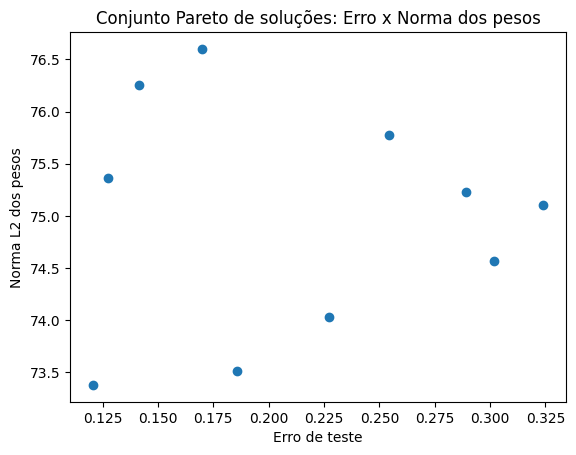

In [ ]:
#Função para calcular a norma L2 dos pesos do modelo
def calculate_l2_norm(model):
    l2_norm = sum([np.sum(np.square(layer.kernel.numpy())) for layer in model.layers if 'Conv2D' in str(layer) or 'Dense' in str(layer)])
    return l2_norm

#Preparar os dados para o gráfico do conjunto Pareto
pareto_error_data = [objective(params) for params in result.x_iters]
pareto_norm_data = [calculate_l2_norm(build_model()) for params in result.x_iters]

#Criar o gráfico do conjunto Pareto
plt.scatter(pareto_error_data, pareto_norm_data)
plt.xlabel("Erro de teste")
plt.ylabel("Norma L2 dos pesos")
plt.title("Conjunto Pareto de soluções: Erro x Norma dos pesos")
plt.show()